#### <a href="https://colab.research.google.com/github/Ansi4Ansi/Google_colab/blob/main/ml_course/ml_b2c2024q2_simkin_HW06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
import plotly.graph_objects as go
import numpy as np
from torch import nn
from collections import defaultdict
import torchvision
from torchvision import transforms as T
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.pyplot as plt

%matplotlib inline

torch.manual_seed(42)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.1 MB/s eta 0:00:00:00:0100:01


**Оформление ДЗ**:

- Выполненное ДЗ сохраните в файл ``ml_b2c2024q2_<фамилия>_HW06.ipynb`` (пример ``ml_b2c2024q2_dral_HW05.ipynb``)
- Зарегистрироваться и залогиниться в сервисе [Everest](https://everest.distcomp.org/)
- Перейти на страницу приложения: [BDT-grader-ML-B2C](https://everest.distcomp.org/apps/BigDataTeam/BDT-grader-ML-B2C)
- Выбрать вкладку Submit Job (если отображается иная).
- Выбрать в качестве “Task” значение: ``HW06:Introduction to neural networks`` (кодовое название для преподвателей: ``nn_intro``)
- Загрузить в качестве “Task solution” файл с решением
- В качестве Access Token указать тот, который был выслан по почте или в телеграм от аккаунта @bdt_manager

**Вопросы**:
- Свои вопросы присылайте в Телеграм.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

    https://forms.gle/iY5NRn9UfaZ344rbA

# Вопросы на понимание (10%)

1. Какие меры две меры ошибки мы используем для регрессии и для классификации в нейросетях?
2. В чем задача активаций в нейросетях? Что будет происходить если их не использовать?
3. Как можно понять что при тренировке выбран слишком высокий learning rate? А слишком низкий?
4. У нас есть конволюционный слой с 3х3 фильтром, 32 входными каналами и 128 выходными. Какова размерность весов этого слоя? Сколько всего тренируемых параметров в этом слое?
5. Может ли нейросеть делать правильное предсказание БЕЗ обучения? Почему/почему нет?

Пишите ответы внизу.


1. При регрессии мы используем **mean squared error (MSE)** рассчитывается как среднее квадратов разностей между предсказанными и истинными значениями.\
   При классификации мы используем **Сross-entropy**.
2. Активационные функции в нейронных сетях будет ли нейрон активирован и какой сигнал он передаст дальше по сети.
   Использование активационных функций позволяет нейросети построить сложную нелинейную модель и определить сложные зависимости даже с кусочно постоянными функциями активации типа **ReLU**.
   Также, использование функций активации можно представить как возможность построения новых информационных описаний данных.\
   Если не использовать активационные функции, то нейронная сеть будет представлять собой просто **линейную модель** (матричное умножение весов в итоге даст линейную систему). 
   Она будет выдавать один и тот же результат независимо от входных данных. 

3. **Слишком высокий learning rate** может привести к тому, что модель будет обучаться слишком быстро и может пропустить закономерности в данных, что может привести к снижению точности.

    Признаки слишком высокого learning rate:
    * Модель быстро достигает высокой точности на обучающей выборке, но плохо работает на тестовых данных.
    * Графики точности и потерь имеют резкие колебания.\

**Слишком низкий learning rate** может привести к тому, что модель будет обучаться слишком медленно и может застрять в локальных минимумах функции потерь и может привести к снижению точности модели.\
    Признаки слишком низкого learning rate:
   * Модель медленно достигает высокой точности на обучающей выборке.
   * Графики точности и потерь имеют небольшие изменения.

4. Количество весов фильтра: 3* 3 * 32 = 288\
   Количество выходных каналов: 128\
   Количество тренируемых параметров: 324*128 = 41472

5. Нейросеть **в крайне исключительных случаях** может делать правильные предсказания без обучения, если изначальная инициализация весов "угадала" поведение модели. Во время обучения нейросети происходит настройка ее параметров(весов) чтобы нейросеть могла выдавать правильные и стабильные предсказания на основе новых данных. Без обучения - нейросеть просто мат. модель, которая может давать правильные предсказания, если только сильно повезло.



# Простые операции на тензорах (5%)

In [3]:
# создайте тензоры x,y нормально распределенных случайных чисел размером (3, 5, 4) и (4, 7)

x = torch.rand(3, 5, 4)
y = torch.rand(4 ,7)
# проверка
assert x.size() == (3, 5, 4)
assert y.size() == (4, 7)

In [4]:
# каков будет размер (измерения) произведения этих тензоров? (dot product) запишите ответ в переменную

dot_product_shape = (3, 5, 7)

# проверка
assert (x @ y).size() == dot_product_shape

In [5]:
# Если мы объединим 2 последних измерения тензора x в одно, каким будет размер тензора х?
# Проверьте себя

new_x_shape = (3, 20)
x_reshaped = x.reshape(new_x_shape)
assert x_reshaped.size() == new_x_shape

In [6]:
# Другие операции с тензорами (работает так же как numpy), работаем с тензором x

# Максимальное значение в тенсоре
print(f"Max value in x: {x.max()}")

# Среднее значение по второму измерению (hint: индексация с нуля)
print(f"Mean value in dim 2:\n{x.mean(axis=1)}")

Max value in x: 0.9998044371604919
Mean value in dim 2:
tensor([[0.5458, 0.5214, 0.3151, 0.1967],
        [0.3906, 0.1595, 0.4500, 0.2790],
        [0.4378, 0.3888, 0.7130, 0.4783]])


# Автоматическая дифференциация (10%)

Одна из главных фишек PyTorch и других библиотек для Deep Learning заключается в очень быстром расчете производных и градиентов.

Создайте функцию `def f(x:torch.Tensor) -> torch.Tensor:` вида

$x^4 - 3x^3 - 10x^2 - 3x + 50$

Посчитайте градиенты этой функции на промежутке (-2, 8) с шагом 0.1 (или меньшим, для красоты)

Воспользуйтесь функцией `plot_derivative_results` для построения графика

In [7]:
import plotly
plotly.__version__

'5.18.0'

tensor(3.0417, grad_fn=<UnbindBackward0>)


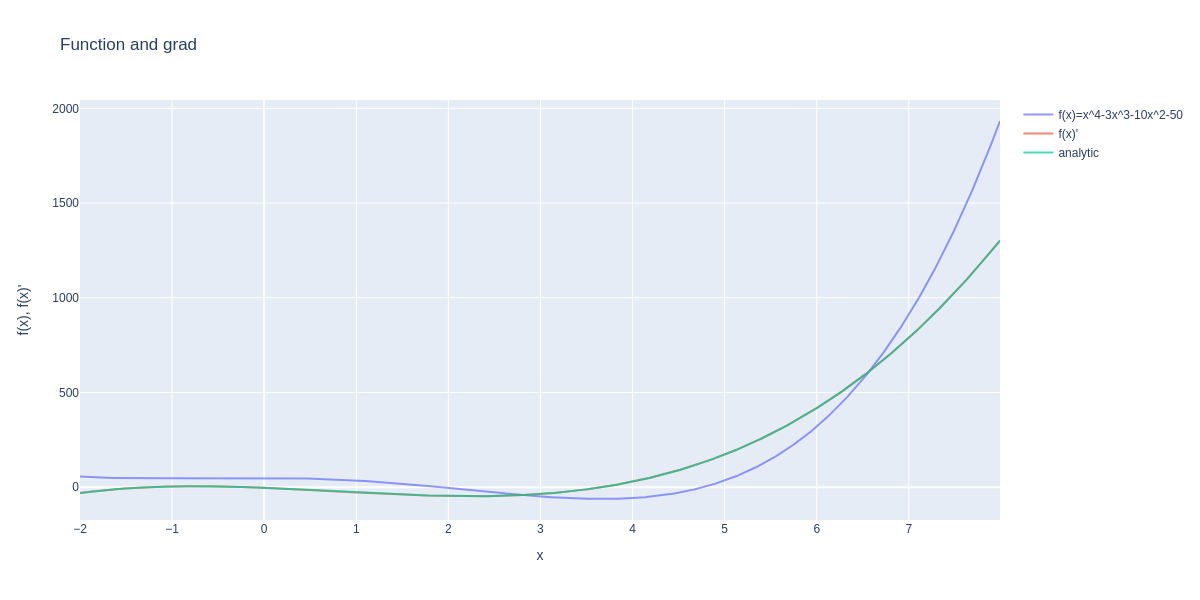

In [8]:
# постройте график функции f(x) и ее градиента
def plot_derivative_results (x: torch.Tensor, y: torch.Tensor, derivative: torch.Tensor, analytic: torch.Tensor):    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='f(x)=x^4-3x^3-10x^2-50', opacity=0.7))
    fig.add_trace(go.Scatter(x=x, y=derivative, mode='lines', name="f(x)'", opacity=0.7))
    fig.add_trace(go.Scatter(x=x, y=analytic, mode='lines', name="analytic", opacity=0.7))
    fig.update_layout(title='Function and grad', width=1200, height=600, xaxis_title='x', yaxis_title="f(x), f(x)'")
    fig.show(renderer="png")
    
def f(x: torch.Tensor) -> torch.Tensor:
    return x**4 - 3*x**3 - 10*x*x -3*x + 50

def analytic_derivative(x: torch.Tensor) -> torch.Tensor:
    return 4*x**3 - 9*x**2 - 20*x - 3

x = torch.arange(-2, 8, 0.01, requires_grad = True)
y = f(x)
analytic = analytic_derivative(x)
grads = torch.gradient(y, spacing = 0.01) # Указываем spacing что бы совпасть с масштабом

diff = abs(grads[0] - analytic)
print(max(diff))

# Строим 3 графика - график функции, численно посчитанный градиент и аналитическую производную
# График аналитической производной совпал с численно расчитанным градиентом, небольшие расхождения есть на границах.
plot_derivative_results(x.detach(), y.detach(), grads[0].detach(), analytic.detach())






## NN in PyTorch 75%

Основная часть этого домашнего задания будет основана на создании нейросетей для датасета CIFAR10.
Мы создадим и натренируем 3 модели:
1. Полносвязная нейросеть (Fully Connected). 2 скрытых слоя размером 512 и 128 нейронов. (25%)
2. Сверточная нейросеть (CNN). 3 сверточных слоя с макс пуллингом и 2 полносвязных слоя. (25%)
3. Крутая сверточная нейросеть (CNN). Архитектура как вторая, но со всеми приемами которые мы разбирали (Dropout, BatchNorm, Early Stopping, Weight Decay). (25%)

### Функции для тренировки и тестирования

Вам нужно будет создать 4 функции, `get_dataloaders` `get_accuracy`, `train_model`, `test_model`.

### Загрузка данных

Сначала нам надо создать функцию для загрузки данных `get_dataloaders`. Порядок действий:

1. Создать base_transforms. Они переводят картинку в тензор и нормализуют его.
2. Создать train_transforms. Они добавляют аугментации для тренировочного датасета.
3. Загрузить тренировочный и тестовый датасеты (`torchvision.datasets.CIFAR10`).
4. Разделить тренировочный датасет на тренировочный и валидационный. Для этого можно использовать `torch.utils.data.random_split`, 20 процентов тренировочных картинок должны попасть в валидационный датасет.
5. Создать даталоадеры для тренировочного, валидационного и тестового датасетов. Для тренировочного датасета `shuffle=True`, для остальных `shuffle=False`.
6. Вернуть тренировочный, валидационный и тестовый даталоадеры.


`num_workers`, `batch_size` и `pin_memory` это параметры даталоадеров, которые могут повлиять на скорость загрузки данных. Почитайте про них в документации PyTorch.

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
50000
10000


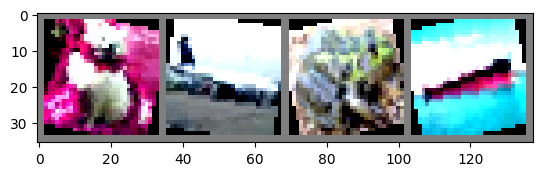

In [18]:
def get_dataloaders(
    transform: T.Compose = T.Compose([]),
    batch_size: int = 256,
    num_workers: int = 8,
    pin_memory: bool = True,
    val_fraction: float = 0.2,
) -> tuple[DataLoader, DataLoader, DataLoader]:
    base_transform = T.Compose([T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


    final_transform = T.Compose([transform, base_transform])
   

    # Для трэйна добавим отдельно augumentation от входного transform
    trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=final_transform)
    # Грузим данные без augumentation в val и test
    valset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=base_transform)    
    testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=base_transform)

    val_size = int(val_fraction * len(trainset))
    indices = torch.randperm(len(trainset))
    
    trainaset = torch.utils.data.Subset(trainset, indices[:-val_size])
    valset = torch.utils.data.Subset(valset, indices[-val_size:])
    
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return trainloader, valloader, testloader

# проверка
batch_size = 4
trainloader, valloader, testloader = get_dataloaders(
    transform = T.Compose([T.RandomResizedCrop(32, scale=(0.9, 1.1), antialias=True),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    T.RandomRotation(15),
                          ]),batch_size = batch_size
)
images, labels = next(iter(trainloader))
assert images.size() == (batch_size, 3, 32, 32)
assert labels.size() == (batch_size,)

print(len(trainloader.dataset))
print(len(valloader.dataset))

# / 2 + 0.5 - это чтобы перевести значения из диапазона [-1, 1] в [0, 1]
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).numpy() / 2 + 0.5)


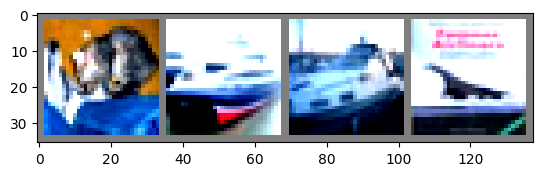

In [5]:
images, labels = next(iter(valloader))
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).numpy() / 2 + 0.5)

#### `get_accuracy`

Функция должна считать точность (количество правильных ответов / общее количество ответов). Пригодятся `tensor.argmax`, сравнение тензоров, `tensor.item`, `tensor.sum`.

In [6]:
def get_accuracy(outputs: torch.Tensor, labels: torch.Tensor) -> float:
    """
    Outputs - предсказания модели (batch_size, n_classes)
    Labels - истинные значения (batch_size, 1)
    """
    preds = outputs.argmax(dim=1)
    correct = (preds == labels).sum().item()
    total = len(labels)
    acc = correct / total
    return acc

# проверка
outputs = torch.tensor([[0.1, 0.2, 0.7], [0.9, 0.05, 0.05], [0.2, 0.2, 0.6]])
labels = torch.tensor([2, 0, 2])

assert get_accuracy(outputs, labels) == 1

#### `train_model`

Основная функция для тренировки модели. На вход подается модель, даталоадеры для тртренировочного и валидационного датасетов.
На ваше усмотрения можете добавить все гиперпараметры, которые считаете нужными (learning rate, num epochs, weight decay etc).

Порядок действий:

1. Перевести модель в режим тренировки
2. Создать критерион для подсчета ошибки
3. Создать оптимизатор (Adam)
4. Переместить модель на gpu (если доступно)
5. Создать словарь для метрик (train_loss, train_acc, val_loss, val_acc)
6. Создать цикл для количества эпох
7. Внутри цикла создать цикл для тренировочного и валидационного даталоадеров
8. Внутри цикла для тренировочного даталоадера:
    1. Обнулить градиенты
    2. Переместить данные на gpu
    3. Посчитать предсказания
    4. Посчитать ошибку
    5. Посчитать градиенты
    6. Сделать шаг оптимизатора
    7. Сохранить метрики
 9. Внутри цикла для валидационного даталоадера:
    1. Перевести модель в режим валидации
    2. Посчитать предсказания
    3. Посчитать ошибку
    4. Сохранить метрики

In [14]:
torch.cuda.is_available()

True

In [7]:
def get_string_output(epoch: int, metrics:dict[str, list]) -> str:
    """Print the epoch results"""
    train_loss = metrics['train_loss'][epoch]
    val_loss = metrics['val_loss'][epoch]
    train_acc = metrics['train_acc'][epoch]
    val_acc = metrics['val_acc'][epoch]
    loss_string = f"[Epoch {epoch + 1}] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
    acc_string = f"Train Accuracy: {train_acc * 100:.2f}%, Val Accuracy: {val_acc * 100:.2f}%"
    return loss_string + acc_string

def train_model(
    model: nn.Module,
    trainloader: DataLoader,
    valloader: DataLoader,
    num_epochs: int = 10,
    lr: float = 1e-3,
) -> dict[str, list[float]]:
    metrics = dict(train_loss=[], val_loss=[], train_acc=[], val_acc=[])
    # move model to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    # init loss, optimiser
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        # save metrics from each batch to calculate mean per epoch
        epoch_metrics = defaultdict(list)
        model.train()
        # Train loop
        for data in trainloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            acc = get_accuracy(outputs, labels)
            epoch_metrics['train_acc'].append(acc)
            epoch_metrics['train_loss'].append(loss.item())

        # Validation loop
        model.eval()
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                acc = get_accuracy(outputs, labels)
                epoch_metrics['val_acc'].append(acc)
                epoch_metrics['val_loss'].append(loss.item())
        # Housekeeping
        for k,v in epoch_metrics.items():
            metrics[k].append(np.mean(v))
        print(get_string_output(epoch, metrics))
    return metrics

#### `test_model`

Функция для тестирования модели. На вход подается модель и даталоадер для тестового датасета.

Порядок действий похож на `train_model`, но с некоторыми отличиями:

* Не нужно обновлять веса модели
* Не нужно считать градиенты
* Соответсвенно, не нужен оптимизатор
* Нет цикла для эпохов
* Только один цикл для даталоадера
  
Функция должна вернуть точность и лосс на тестовом датасете.

In [8]:
def test_model(model: nn.Module, testloader: DataLoader) -> tuple[float, float]:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    acc = []
    loss_report = []
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            acc.append(get_accuracy(outputs, labels))
            loss_report.append(loss.item())
    return np.mean(loss_report), np.mean(acc)

#### Проверка функций

После этого можно проверить функции `train_model` и `test_model`.
Для этого у вас есть модель `BadModel` (что она делает?).

Попробуйте "натренировать" эту модель на одной эпохе и проверить работоспособность функций.

In [9]:
%%time
class BadModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1, 10)

    def forward(self, x):
        xmean = x.mean(dim=(1, 2, 3)).unsqueeze(1)
        x = self.layer(xmean)
        return x


trainloader, valloader, testloader = get_dataloaders()
bad_model = BadModel()
train_metrics = train_model(bad_model, trainloader, valloader, num_epochs=1)
test_loss, test_acc = test_model(bad_model, testloader)
print(f"Test Loss: {test_loss:.4f}, Test acc: {test_acc * 100:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[Epoch 1] Train Loss: 2.3844, Val Loss: 2.3532, Train Accuracy: 10.68%, Val Accuracy: 11.29%
Test Loss: 2.3603, Test acc: 11.08%
CPU times: user 3.46 s, sys: 1.35 s, total: 4.81 s
Wall time: 11.7 s


### Создание моделей

Если все прошло успешно, можно переходить к созданию моделей.

#### Полносвязная нейросеть

Параметры - 2 скрытых слоя размером 512 и 128 нейронов. Активация - ReLU.

Используйте `nn.Linear`, `torch.relu`, `tensor.flatten` или `tensor.view`.

Натренируйте модель на 30 эпохах. Посмотрите на точность на тренировочном, валидационном и тестовом датасетах.

Постройте график лосса и точности на тренировочном и валидационном датасетах.

**Вопросы:**

1. Какая точность на тестовом датасете?
2. Как быстро сходится модель?
3. Происходит ли переобучение?
4. Если да, то в какой момент?

**Ответы**
1. Точность на тестовом датасете - 53.02%
2. Сходимость нейросети на минимизации функции потерь на валидационном датасете - 13я эпоха, после этого validation loss начинает колебаться вокруг значения 1.4, и после переобучения начинает расти.
3. Да, на сети происходит переобучение.
4. Ориентировочно на 21й эпохе, validation loss начинает расти относительно базового уровня.

In [19]:
%%time
class SimpleNN(nn.Module):
    def __init__(self, image_size : int = 32, channels: int = 3): #CIFAR10 - image size 32x32x3
        super().__init__()

        self.fc1 = nn.Linear(image_size * image_size * channels, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = x.flatten(1, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


trainloader, valloader, testloader = get_dataloaders(
    transform = T.Compose([T.RandomResizedCrop(32, scale=(0.9, 1.1), antialias=True),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    T.RandomRotation(15),
                          ]),
)
model = SimpleNN()
train_metrics_simple = train_model(model, trainloader, valloader, num_epochs=30)
test_loss_simple, test_acc_simple = test_model(model, testloader)
print(f"Test Loss: {test_loss_simple:.4f}, Test acc: {test_acc_simple * 100:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[Epoch 1] Train Loss: 1.7269, Val Loss: 1.5345, Train Accuracy: 38.58%, Val Accuracy: 45.76%
[Epoch 2] Train Loss: 1.5451, Val Loss: 1.4752, Train Accuracy: 44.91%, Val Accuracy: 48.02%
[Epoch 3] Train Loss: 1.4698, Val Loss: 1.4037, Train Accuracy: 47.74%, Val Accuracy: 49.91%
[Epoch 4] Train Loss: 1.4201, Val Loss: 1.3679, Train Accuracy: 49.46%, Val Accuracy: 51.64%
[Epoch 5] Train Loss: 1.3797, Val Loss: 1.3243, Train Accuracy: 51.10%, Val Accuracy: 53.37%
[Epoch 6] Train Loss: 1.3462, Val Loss: 1.2713, Train Accuracy: 52.27%, Val Accuracy: 55.10%
[Epoch 7] Train Loss: 1.3221, Val Loss: 1.2572, Train Accuracy: 52.89%, Val Accuracy: 55.06%
[Epoch 8] Train Loss: 1.2942, Val Loss: 1.2127, Train Accuracy: 53.85%, Val Accuracy: 56.82%
[Epoch 9] Train Loss: 1.2704, Val Loss: 1.2093, Train Accuracy: 54.80%, Val Accuracy: 57.26%
[Epoch 10] Train Loss: 1.2451, Val Loss: 1.2045, 

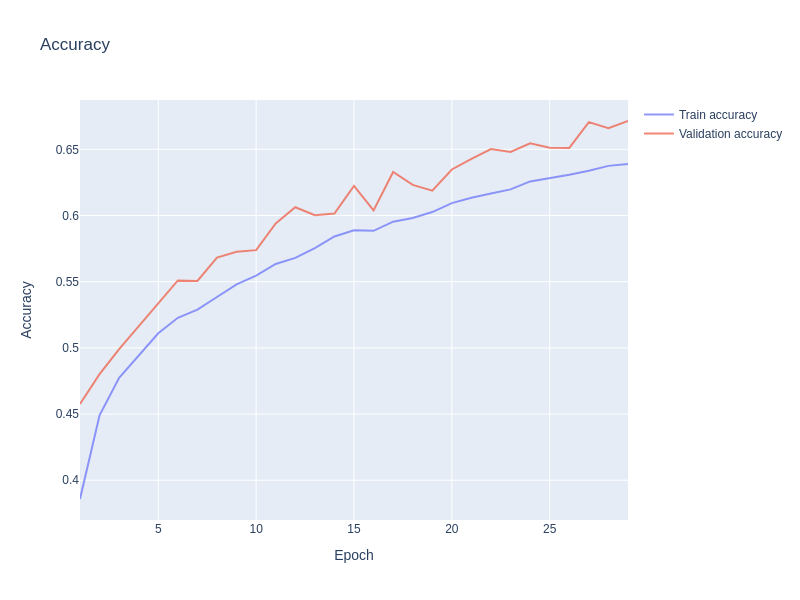

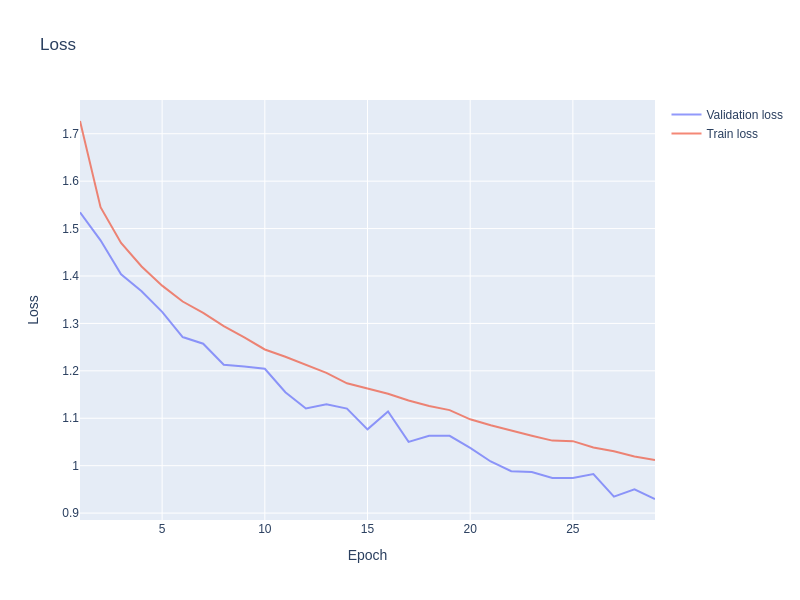

In [20]:
def plot_accuracy_loss(p_train_metrics : defaultdict(list)) :
    x = torch.arange(1, len(p_train_metrics['train_acc']))
    fig1 = go.Figure()
    
    fig1.add_trace(go.Scatter(x=x, y=p_train_metrics['train_acc'], mode='lines', name='Train accuracy', opacity=0.7))
    fig1.add_trace(go.Scatter(x=x, y=p_train_metrics['val_acc'], mode='lines', name='Validation accuracy', opacity=0.7))    
    fig1.update_layout(title='Accuracy', width=800, height=600, xaxis_title='Epoch', yaxis_title='Accuracy')
    fig1.show(renderer="png")
    
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=x, y=p_train_metrics['val_loss'], mode='lines', name='Validation loss', opacity=0.7))
    fig2.add_trace(go.Scatter(x=x, y=p_train_metrics['train_loss'], mode='lines', name='Train loss', opacity=0.7))
    fig2.update_layout(title='Loss', width=800, height=600, xaxis_title='Epoch', yaxis_title='Loss')
    fig2.show(renderer="png")
    
plot_accuracy_loss(train_metrics_simple)

#### Сверточная нейросеть

Параметры - 3 сверточных слоя с макс пуллингом и 2 полносвязных слоя. Активацонная функция тоже ReLU.

Используйте `nn.Conv2d`, `nn.MaxPool2d`, остальные функции как в предыдущей модели.

Для сверточных слоев используйте `kernel_size=3`, `padding=1`, `stride=1`. Для макс пуллинга `kernel_size=2`, `stride=2`.

Натренируйте модель на 30 эпохах. Посмотрите на точность на тренировочном, валидационном и тестовом датасетах.

Постройте график лосса и точности на тренировочном и валидационном датасетах.

**Вопросы:**

1. Какая точность на тестовом датасете?
2. Как быстро сходится модель?
3. Происходит ли переобучение?
4. Если да, то в какой момент?
5. Какая модель лучше, полносвязная или сверточная?

**Ответы**
1. Точность - 80.92%%
2. Быстро - сходимость уже на 12й эпохе
3. Да, переобучение происходит
4. loss на валидации начинает расти на 13й эпохе
5. Сверточная модель лучше, итоговая точность на тестовом датасете выше.

In [33]:
%%time
class SimpleCNN(nn.Module):
    def __init__(self, image_size : int = 32, channels: int = 3):
        super().__init__()
        self.image_size = image_size
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)

        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.flatten(1, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


trainloader, valloader, testloader = get_dataloaders(
    transform = T.Compose([T.RandomHorizontalFlip(0.7), T.RandomResizedCrop(32, scale=(0.9, 1.1), antialias=True),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    T.RandomRotation(15),]),
    num_workers = 4)
model = SimpleCNN()
train_metrics_simple_cnn = train_model(model, trainloader, valloader, num_epochs=30)
test_loss_simple_cnn, test_acc_simple_cnn = test_model(model, testloader)
print(f"Test Loss: {test_loss_simple_cnn:.4f}, Test acc: {test_acc_simple_cnn * 100:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[Epoch 1] Train Loss: 1.6330, Val Loss: 1.3219, Train Accuracy: 40.26%, Val Accuracy: 51.94%
[Epoch 2] Train Loss: 1.2648, Val Loss: 1.0919, Train Accuracy: 54.75%, Val Accuracy: 60.92%
[Epoch 3] Train Loss: 1.0920, Val Loss: 0.9873, Train Accuracy: 61.23%, Val Accuracy: 64.77%
[Epoch 4] Train Loss: 0.9693, Val Loss: 0.8072, Train Accuracy: 65.87%, Val Accuracy: 71.34%
[Epoch 5] Train Loss: 0.8910, Val Loss: 0.7236, Train Accuracy: 68.76%, Val Accuracy: 74.53%
[Epoch 6] Train Loss: 0.8211, Val Loss: 0.7048, Train Accuracy: 71.11%, Val Accuracy: 75.17%
[Epoch 7] Train Loss: 0.7702, Val Loss: 0.6501, Train Accuracy: 72.47%, Val Accuracy: 77.26%
[Epoch 8] Train Loss: 0.7301, Val Loss: 0.6068, Train Accuracy: 74.49%, Val Accuracy: 78.27%
[Epoch 9] Train Loss: 0.6840, Val Loss: 0.5878, Train Accuracy: 76.16%, Val Accuracy: 79.50%
[Epoch 10] Train Loss: 0.6560, Val Loss: 0.5353, 

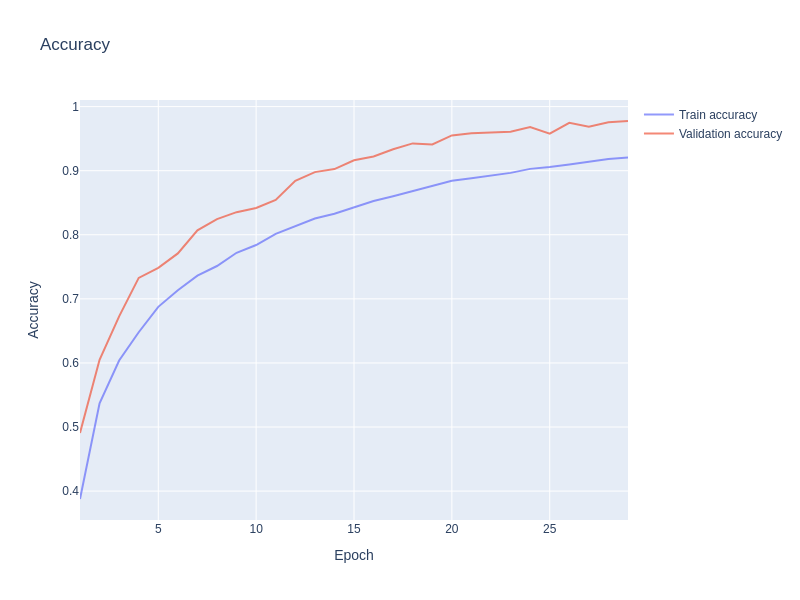

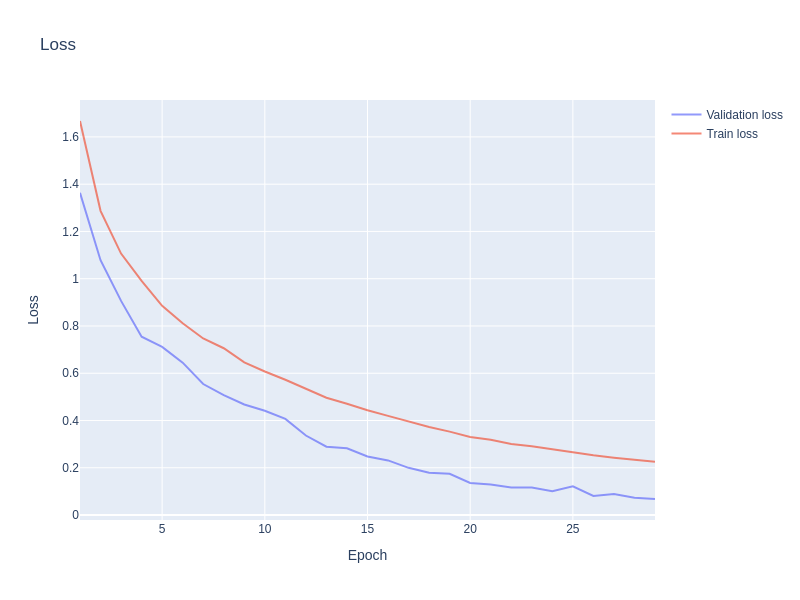

In [22]:
plot_accuracy_loss(train_metrics_simple_cnn)

#### Крутая сверточная нейросеть

Задание аналогично предыдущему, но добавьте все приемы, которые мы разбирали (Dropout, BatchNorm, Early Stopping, Weight Decay, Data Augmentation).
Возможно Вам придется переписать функции `get_dataloaders`, `train_model` и `test_model`.

Цель - точность в 80% на тестовом датасете. Ограничение в 30 эпох.

In [27]:
class EarlyStopping():
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [28]:
%%time
def train_model_cnn(
    model: nn.Module,
    trainloader: DataLoader,
    valloader: DataLoader,
    num_epochs: int = 10,
    learning_rate: float = 1e-3,
    weight_decay = 5e-4,
    patience = 5, 
) -> dict[str, list[float]]:
    metrics = dict(train_loss=[], val_loss=[], train_acc=[], val_acc=[])
    # move model to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    # init loss, optimiser
    criterion = nn.CrossEntropyLoss()
    
    # Ставим weight_decay в оптимайзер - оптимайзер AdamW
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Параметры LR, выбираем экспоненциальное уменьшение
    learning_rate_decay_factor = 0.9
    learning_rate_decay_step = 3
    lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=learning_rate_decay_factor, last_epoch=-1)
    
    early_stopping = EarlyStopping(patience = patience)
    
    for epoch in range(num_epochs):
        # save metrics from each batch to calculate mean per epoch
        epoch_metrics = defaultdict(list)
        model.train()
        # Train loop
        for data in trainloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            acc = get_accuracy(outputs, labels)
            epoch_metrics['train_acc'].append(acc)
            epoch_metrics['train_loss'].append(loss.item())
        # Уменьшение lr согласно выбранной стратегии
        if epoch % learning_rate_decay_step == 0:
            lr_scheduler.step()
        print(f'Epoch {epoch} learning rate {lr_scheduler.get_last_lr()}')

        # Validation loop
        model.eval()
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                acc = get_accuracy(outputs, labels)
                epoch_metrics['val_acc'].append(acc)
                epoch_metrics['val_loss'].append(loss.item())
                
        # Используем проверку на early stopping
        early_stopping(np.mean(epoch_metrics['val_loss']))
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        # Housekeeping
        for k,v in epoch_metrics.items():
            metrics[k].append(np.mean(v))
        print(get_string_output(epoch, metrics))
    return metrics

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 15.7 µs


In [32]:
%%time
class ModifiedCNN(nn.Module):
    def __init__(self, image_size : int = 32, channels: int = 3, p_dropout: float = 0.25):
        super().__init__()
        self.image_size = image_size
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch32 = nn.BatchNorm2d(32)
        self.batch64 = nn.BatchNorm2d(64)
        self.batch128 = nn.BatchNorm2d(128)
        self.batch_fc1 = nn.BatchNorm1d(512)
        self.batch_fc2 = nn.BatchNorm1d(256)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.dropout = nn.Dropout(p = p_dropout)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.pool(torch.relu(self.batch32(self.conv1(x))))
        x = self.pool(torch.relu(self.batch64(self.conv2(x))))
        x = self.pool(torch.relu(self.batch128(self.conv3(x))))
        
        x = x.flatten(1, -1)
        
        x = torch.relu(self.batch_fc1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_fc2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


trainloader, valloader, testloader = get_dataloaders(
    transform = T.Compose([T.RandomHorizontalFlip(0.7), T.RandomResizedCrop(32, scale=(0.9, 1.1), antialias=True),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    T.RandomRotation(15),]),
    num_workers = 4)
model = ModifiedCNN(p_dropout = 0.25)
train_metrics_modified_cnn = train_model_cnn(model, trainloader, valloader, num_epochs=30)
test_loss_modified_cnn, test_acc_modified_cnn = test_model(model, testloader)
print(f"Test Loss: {test_loss_modified_cnn:.4f}, Test acc: {test_acc_modified_cnn * 100:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch 0 learning rate [0.0009000000000000001]
[Epoch 1] Train Loss: 1.3627, Val Loss: 1.0094, Train Accuracy: 50.93%, Val Accuracy: 63.88%
Epoch 1 learning rate [0.0009000000000000001]
[Epoch 2] Train Loss: 1.0362, Val Loss: 0.8880, Train Accuracy: 63.12%, Val Accuracy: 68.73%
Epoch 2 learning rate [0.0009000000000000001]
[Epoch 3] Train Loss: 0.9172, Val Loss: 0.7805, Train Accuracy: 67.54%, Val Accuracy: 72.42%
Epoch 3 learning rate [0.0008100000000000001]
[Epoch 4] Train Loss: 0.8439, Val Loss: 0.6895, Train Accuracy: 70.29%, Val Accuracy: 75.51%
Epoch 4 learning rate [0.0008100000000000001]
[Epoch 5] Train Loss: 0.7831, Val Loss: 0.6199, Train Accuracy: 72.40%, Val Accuracy: 77.99%
Epoch 5 learning rate [0.0008100000000000001]
[Epoch 6] Train Loss: 0.7392, Val Loss: 0.5797, Train Accuracy: 74.17%, Val Accuracy: 79.97%
Epoch 6 learning rate [0.000729]
INFO: Early stoppin

**Accuracy на тестовой выборке 84.74%**

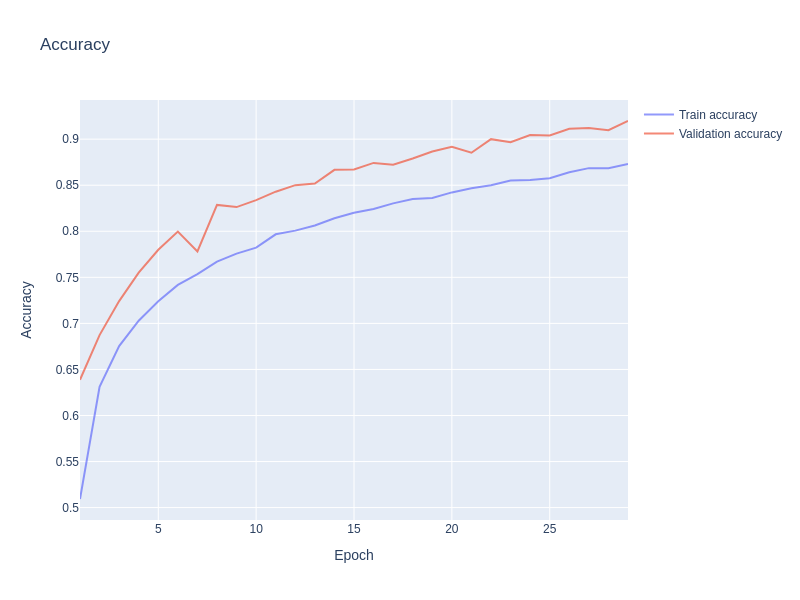

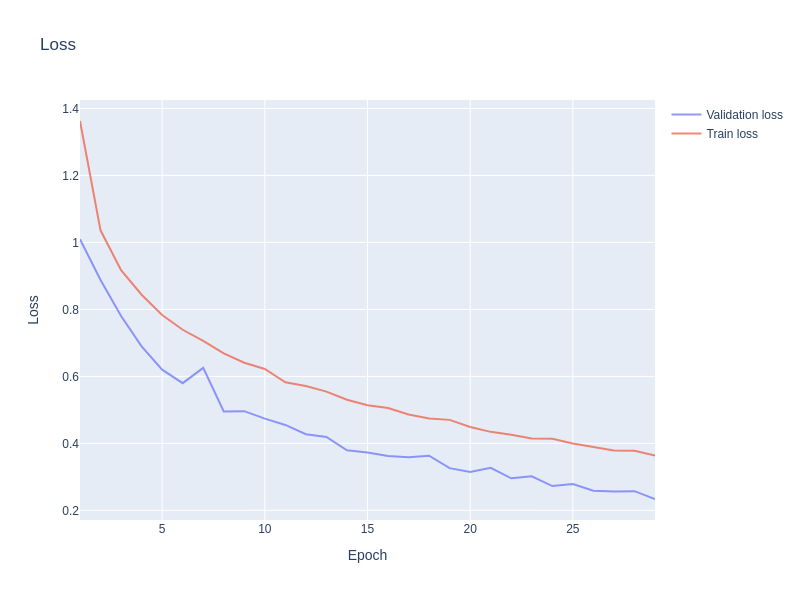

In [34]:
plot_accuracy_loss(train_metrics_modified_cnn)

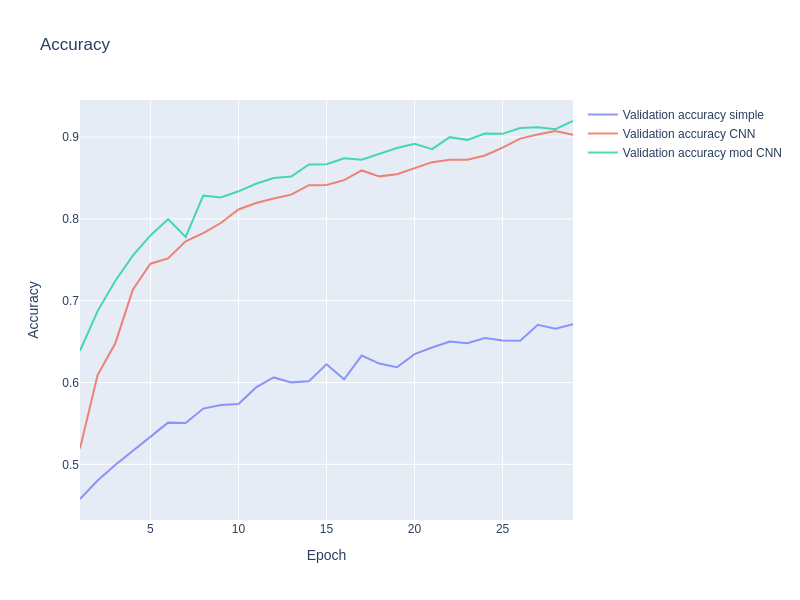

In [35]:
fig = go.Figure()
x = x=torch.arange(1, len(train_metrics_simple['train_acc']))
fig.add_trace(go.Scatter(x=x, y=train_metrics_simple['val_acc'], mode='lines', name='Validation accuracy simple', opacity=0.7))
fig.add_trace(go.Scatter(x=x, y=train_metrics_simple_cnn['val_acc'], mode='lines', name='Validation accuracy CNN', opacity=0.7))
fig.add_trace(go.Scatter(x=x, y=train_metrics_modified_cnn['val_acc'], mode='lines', name='Validation accuracy mod CNN', opacity=0.7))
fig.update_layout(title='Accuracy ', width=800, height=600, xaxis_title='Epoch', yaxis_title='Accuracy')
fig.show(renderer="png")

In [17]:
# Проверим что даст просто resnet18 по умолчанию
model = torchvision.models.resnet18()
train_metrics_modified_cnn = train_model_cnn(model, trainloader, valloader, num_epochs=30)
test_loss_modified_cnn, test_acc_modified_cnn = test_model(model, testloader)
print(f"Test Loss: {test_loss_modified_cnn:.4f}, Test acc: {test_acc_modified_cnn * 100:.2f}%")

Epoch 0 learning rate [0.0009000000000000001]
[Epoch 1] Train Loss: 1.5002, Val Loss: 1.2404, Train Accuracy: 47.93%, Val Accuracy: 55.72%
Epoch 1 learning rate [0.0009000000000000001]
[Epoch 2] Train Loss: 1.1119, Val Loss: 1.0541, Train Accuracy: 60.51%, Val Accuracy: 63.09%
Epoch 2 learning rate [0.0009000000000000001]
[Epoch 3] Train Loss: 0.9711, Val Loss: 0.9989, Train Accuracy: 65.70%, Val Accuracy: 64.96%
Epoch 3 learning rate [0.0008100000000000001]
[Epoch 4] Train Loss: 0.8798, Val Loss: 0.9038, Train Accuracy: 69.02%, Val Accuracy: 68.01%
Epoch 4 learning rate [0.0008100000000000001]
[Epoch 5] Train Loss: 0.7960, Val Loss: 0.8466, Train Accuracy: 72.01%, Val Accuracy: 70.57%
Epoch 5 learning rate [0.0008100000000000001]
[Epoch 6] Train Loss: 0.7387, Val Loss: 0.7947, Train Accuracy: 74.22%, Val Accuracy: 72.46%
Epoch 6 learning rate [0.000729]
[Epoch 7] Train Loss: 0.6918, Val Loss: 0.7874, Train Accuracy: 75.70%, Val Accuracy: 72.80%
Epoch 7 learning rate [0.000729]
[Epoch 

## Решил ДЗ - дай обратную связь ;)

Надеемся, было интересно и полезно.

Пожалуйста, оставьте обратную связь по этому домашнему заданию: https://forms.gle/iY5NRn9UfaZ344rbA